In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

sns.set_style('darkgrid')


In [ ]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [ ]:
df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df.dropna(subset=['date_added','rating'], inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed',dayfirst=False)

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


In [ ]:
#How has the distribution of content ratings changed over time?

rating_trend = df.groupby(['year_added','rating']).size().reset_index(name='count')

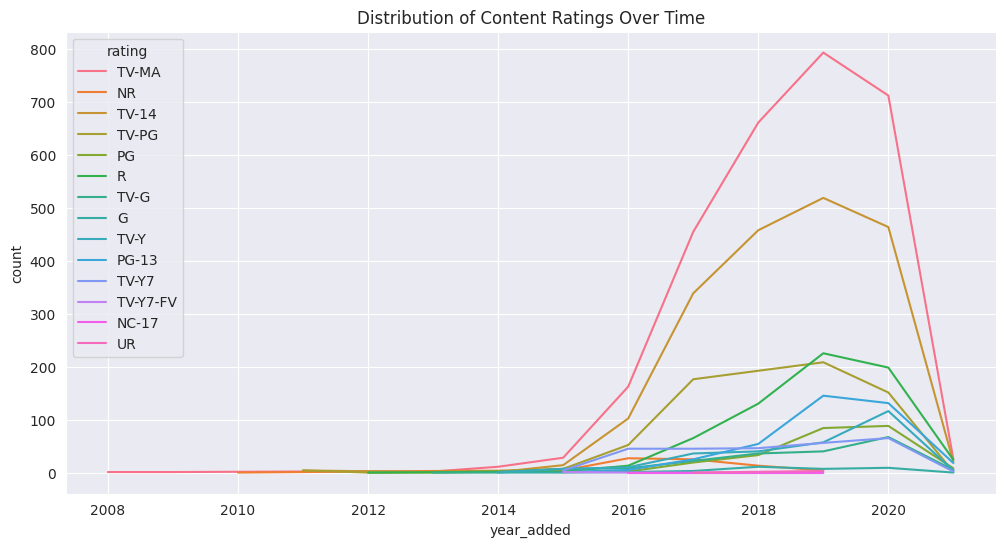

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=rating_trend, x='year_added', y='count', hue='rating')
plt.title('Distribution of Content Ratings Over Time')
plt.show()


In [ ]:
#Is there a relationship between content age and its type (Movie vs. TV Show)?
age_type = df.groupby(['release_year','type']).size().reset_index(name='count')


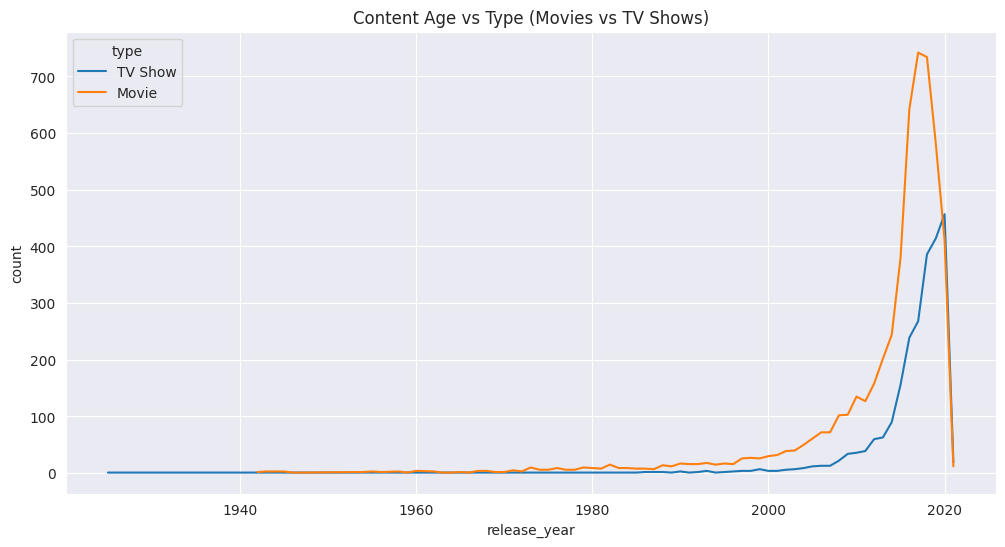

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=age_type, x='release_year', y='count', hue='type')
plt.title('Content Age vs Type (Movies vs TV Shows)')
plt.show()


In [ ]:
#Can we identify any trends in content production based on the release year vs. the year added to Netflix?

df['lag_years'] = df['year_added'] - df['release_year']


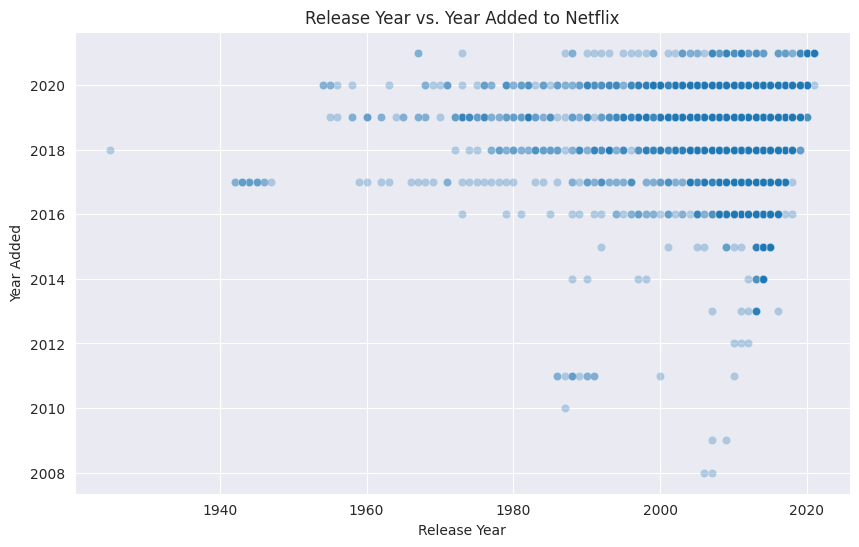

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='release_year', y='year_added', alpha=0.3)
plt.title('Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.show()


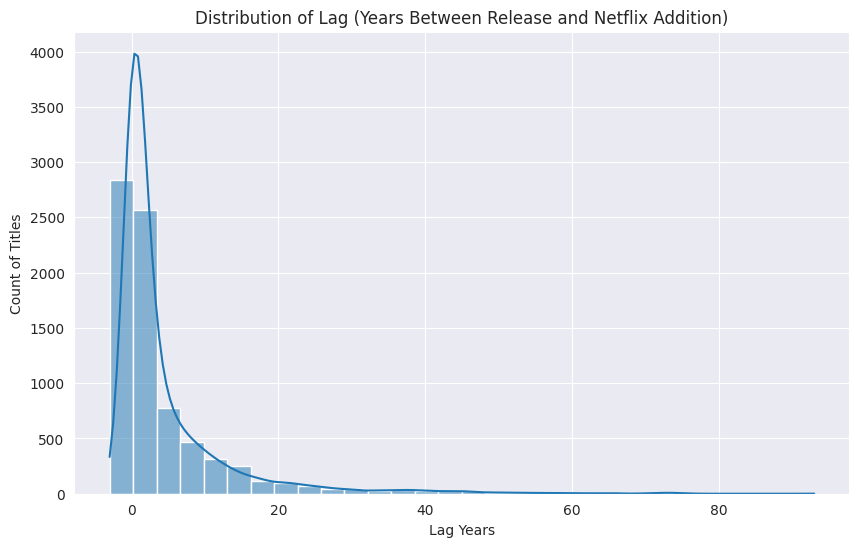

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['lag_years'], bins=30, kde=True)
plt.title('Distribution of Lag (Years Between Release and Netflix Addition)')
plt.xlabel('Lag Years')
plt.ylabel('Count of Titles')
plt.show()


In [ ]:
#What are the most common word pairs or phrases in content descriptions?
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
descriptions = df['description'].dropna().astype(str)

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(descriptions)

sum_words = X.sum(axis=0)
words_freq = {word: sum_words[0, idx] for word, idx in vectorizer.vocabulary_.items()}

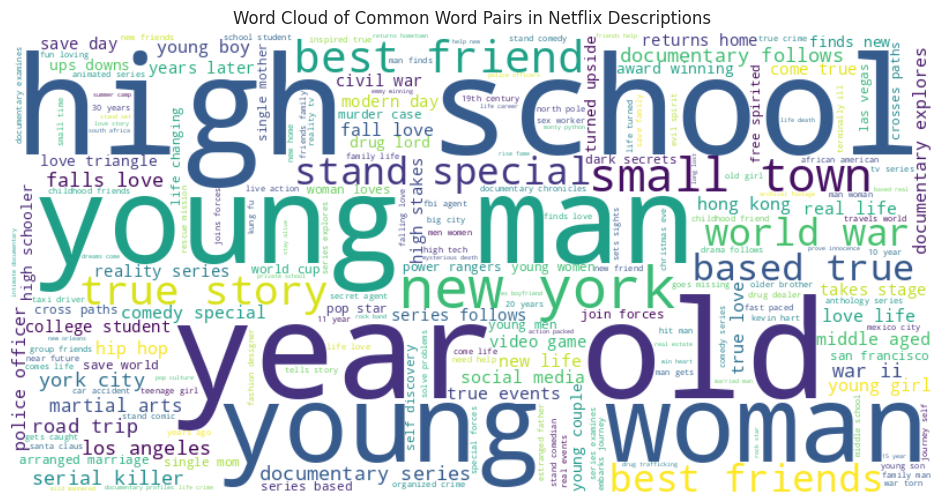

In [ ]:
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis').generate_from_frequencies(words_freq)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Common Word Pairs in Netflix Descriptions")
plt.show()


“young man”, “best friend”, “high school”, “falls love” are common words

In [ ]:
#Who are the top directors on Netflix?
df['director'].head()

,director
0,Unknown
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic


In [ ]:
top_directors = df['director'].value_counts().head(10)
print(top_directors)


director
Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64


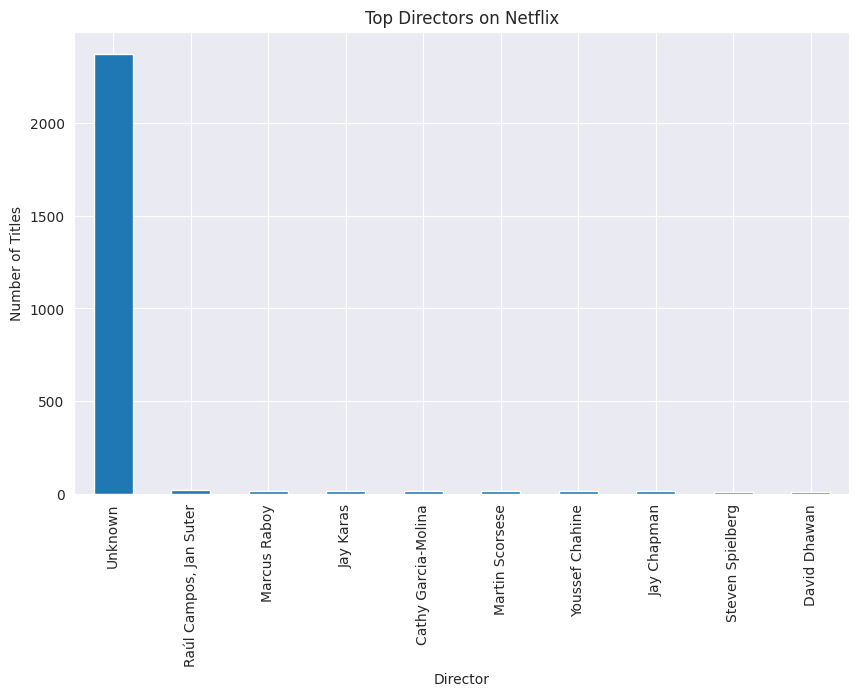

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_directors.plot(kind='bar')
plt.title("Top Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.show()
